# **Tugas 2**



## **Penjelasan Outlier Deteksi**
### Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding

1. Pengertian Outlier dan Deteksi Outlier

 Outlier merupakan data yang memiliki karakteristik berbeda secara signifikan dibandingkan dengan data lain dalam suatu dataset. Outlier bisa muncul karena berbagai faktor, seperti kesalahan dalam pencatatan data, kesalahan input, atau memang mewakili suatu fenomena khusus yang jarang terjadi. Keberadaan outlier dapat memberikan dampak besar pada analisis data dan model machine learning, sehingga perlu diidentifikasi dengan metode yang tepat.

 Deteksi outlier adalah proses untuk menemukan data yang menyimpang dari pola umum dalam dataset. Salah satu teknik yang bisa digunakan untuk mendeteksi outlier adalah K-Nearest Neighbors (KNN), yang bekerja dengan prinsip kedekatan antar data.

2. Mengapa KNN Bisa Digunakan untuk Deteksi Outlier?

 KNN merupakan algoritma berbasis jarak yang menilai hubungan antara titik data berdasarkan seberapa dekat mereka satu sama lain. Dalam konteks deteksi outlier, pendekatan ini berguna karena kita bisa mengukur bagaimana distribusi suatu titik dibandingkan dengan titik-titik lainnya di sekitarnya.

 Prinsip utama KNN dalam mendeteksi outlier adalah sebagai berikut:

  - Jika suatu titik hanya memiliki sedikit tetangga dalam jarak tertentu, kemungkinan besar titik tersebut merupakan outlier.

  - Jika rata-rata jarak suatu titik ke tetangga terdekatnya sangat besar dibandingkan dengan titik lainnya, maka titik tersebut bisa dianggap sebagai outlier.
  
3. Tahapan Deteksi Outlier dengan KNN

 a. Menghitung Jarak Antar Titik Data

  Langkah pertama adalah menentukan jarak antar titik menggunakan metrik seperti:

   - Euclidean Distance (jarak garis lurus antara dua titik) Manhattan Distance (jumlah perbedaan absolut pada setiap dimensi)
 Minkowski Distance (generalisasi dari Euclidean dan Manhattan)

 b. Menentukan Nilai K (Jumlah Tetangga Terdekat)
Pemilihan nilai K berpengaruh besar terhadap hasil deteksi outlier:

  - K terlalu kecil → Model bisa menjadi terlalu sensitif terhadap noise.
K terlalu besar → Deteksi outlier bisa menjadi kurang akurat karena terlalu banyak titik yang dipertimbangkan.

 c. Mengukur Kepadatan Data (Density Score)

 Ada beberapa pendekatan yang digunakan untuk menentukan apakah suatu titik merupakan outlier:

  - K-Nearest Neighbor Distance

  - Menghitung rata-rata jarak titik ke K tetangga terdekatnya.
Jika jarak ini jauh lebih besar dibandingkan dengan titik lainnya, maka titik tersebut bisa dianggap sebagai outlier.
Local Outlier Factor (LOF)

  - LOF membandingkan kepadatan lokal suatu titik dengan kepadatan lokal tetangganya.

  - Jika kepadatan lokal suatu titik jauh lebih rendah dibandingkan dengan tetangganya, maka kemungkinan besar titik tersebut adalah outlier.
Distance-Based Outlier Score

  - Jika dalam radius tertentu suatu titik hanya memiliki sedikit tetangga, maka titik tersebut bisa dianggap sebagai outlier.

4. Kelebihan dan Kekurangan Deteksi Outlier dengan KNN

  Kelebihan:

 - Sederhana dan intuitif, karena hanya berbasis jarak.

 - Tidak memerlukan asumsi distribusi data tertentu, sehingga fleksibel untuk berbagai jenis dataset.

 - Cocok untuk dataset berdimensi tinggi.

 Kekurangan:

 - Membutuhkan komputasi tinggi, terutama untuk dataset besar karena harus menghitung jarak setiap titik terhadap banyak titik lainnya.

 - Pemilihan nilai K yang tidak optimal bisa mengurangi akurasi deteksi outlier.

### Kesimpulan:

KNN merupakan metode yang efektif untuk mendeteksi outlier dalam proses Data Understanding dengan menganalisis hubungan jarak antar data.

Dengan menggunakan pendekatan seperti K-Nearest Neighbor Distance dan Local Outlier Factor (LOF), kita dapat mengidentifikasi data yang memiliki kepadatan rendah atau jaraknya jauh dari kelompok data lainnya.

Agar deteksi outlier berjalan optimal, diperlukan pemilihan nilai K yang sesuai serta penggunaan metrik jarak yang tepat untuk menyesuaikan dengan karakteristik dataset yang digunakan.



In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


 id           class  petal_length  petal_width  sepal length  sepal width  distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5  5.424942    False
  2     Iris-setosa          14.0          2.0          40.9         30.0 46.407542     True
  3     Iris-setosa           1.3          0.2           4.7          3.2  5.430470    False
  4     Iris-setosa           1.5          0.2           4.6          3.1  5.273519    False
  5     Iris-setosa           1.4          0.2           5.0          3.6  5.485435     True
  6     Iris-setosa           1.7          0.4           5.4          3.9  5.288667    False
  7     Iris-setosa           1.4          0.3           4.6          3.4  5.412947    False
  8     Iris-setosa           1.5          0.2           5.0          3.4  5.325411    False
  9     Iris-setosa           1.4          0.2           4.4          2.9  5.316014    False
 10     Iris-setosa           1.5          0.1           4.9          

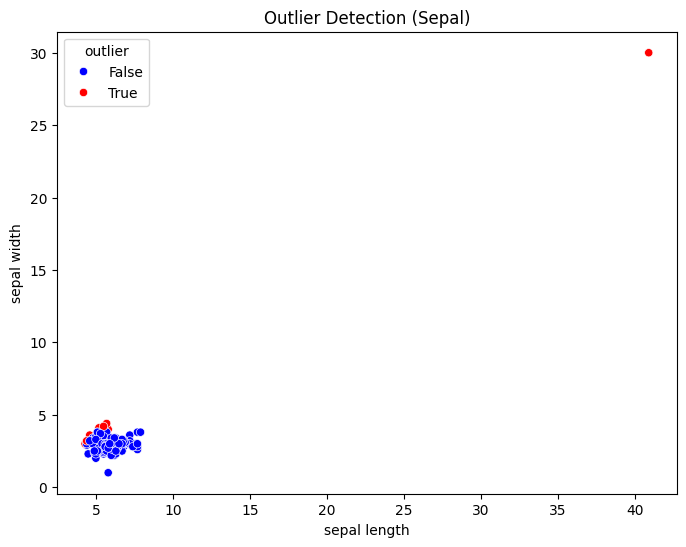

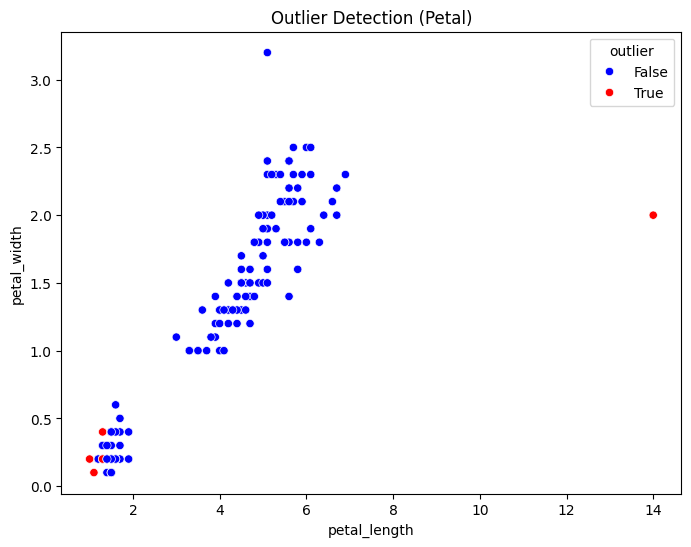

In [9]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-382999bb-posgresqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_AwzON_kzF3kYXNu_CrZ",
        database="defaultdb",
        port=11188
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM nabila.postgres;")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-144b909e-mysqlll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_aAig_mt_KOnGOnNKLDw",
        database="iris",
        port=17474
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal length", "sepal width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 93.5)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal length"], y=df_merged["sepal width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()


In [10]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 10


In [11]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_merged.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  petal_length  petal_width  sepal length  sepal width  distance  outlier
151            ????           5.1          3.2           5.8          1.0  0.000000    False
114  Iris-virginica           5.0          2.0           5.7          2.5  1.926136    False
115  Iris-virginica           5.1          2.4           5.8          2.8  1.969772    False
147  Iris-virginica           5.0          1.9           6.3          2.5  2.049390    False
120  Iris-virginica           5.0          1.5           6.0          2.2  2.092845    False
102  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
143  Iris-virginica           5.1          1.9           5.8          2.7  2.140093    False
122  Iris-virginica           4.9          2.0           5.6          2.8  2.181742    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2  2.202272    False
133  Iris-virginica           5.6          2.2           6.4          